# Pandas


In [3]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# 1.1 Reading data from a csv file

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [8]:
broken_df = pd.read_csv('../../DataSets/competition/kaggle/Bike-Sharing-Demand/kaggle_bike_competition_train.csv')
broken_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [9]:
# Look at the first 3 rows
broken_df[:3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [17]:
fixed_df = pd.read_csv('../../DataSets/competition/kaggle/Bike-Sharing-Demand/kaggle_bike_competition_train.csv', sep=',', encoding='latin1', parse_dates=['datetime'], dayfirst=True, index_col='datetime')
fixed_df[:3]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


# 1.2 Selecting a column

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [25]:
fixed_df['windspeed']

datetime
2011-01-01 00:00:00     0.0000
2011-01-01 01:00:00     0.0000
2011-01-01 02:00:00     0.0000
2011-01-01 03:00:00     0.0000
2011-01-01 04:00:00     0.0000
2011-01-01 05:00:00     6.0032
2011-01-01 06:00:00     0.0000
2011-01-01 07:00:00     0.0000
2011-01-01 08:00:00     0.0000
2011-01-01 09:00:00     0.0000
2011-01-01 10:00:00    16.9979
2011-01-01 11:00:00    19.0012
2011-01-01 12:00:00    19.0012
2011-01-01 13:00:00    19.9995
2011-01-01 14:00:00    19.0012
2011-01-01 15:00:00    19.9995
2011-01-01 16:00:00    19.9995
2011-01-01 17:00:00    19.0012
2011-01-01 18:00:00    16.9979
2011-01-01 19:00:00    16.9979
2011-01-01 20:00:00    16.9979
2011-01-01 21:00:00    12.9980
2011-01-01 22:00:00    15.0013
2011-01-01 23:00:00    19.9995
2011-01-02 00:00:00    19.9995
2011-01-02 01:00:00    16.9979
2011-01-02 02:00:00    19.0012
2011-01-02 03:00:00    12.9980
2011-01-02 04:00:00    12.9980
2011-01-02 06:00:00    19.9995
                        ...   
2012-12-18 18:00:00    22.0028

# 1.3 Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

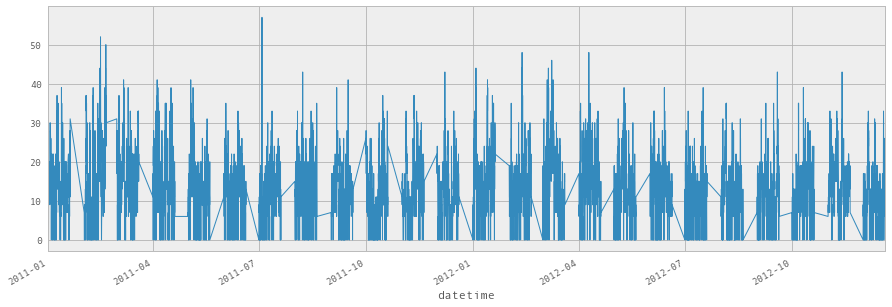

In [27]:
fixed_df['windspeed'].plot()

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

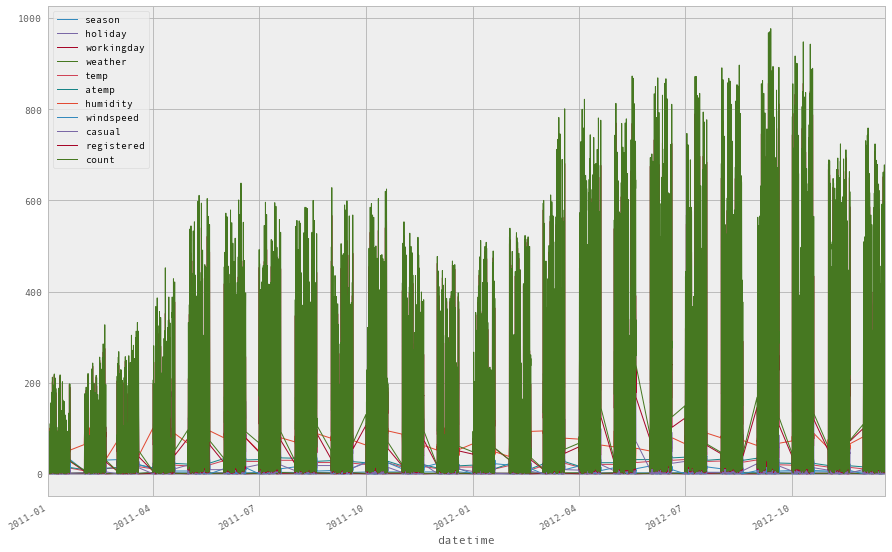

In [19]:
fixed_df.plot(figsize=(15, 10))

# 1.4 Putting all that together

Here's the code we needed to write do draw that graph, all together:

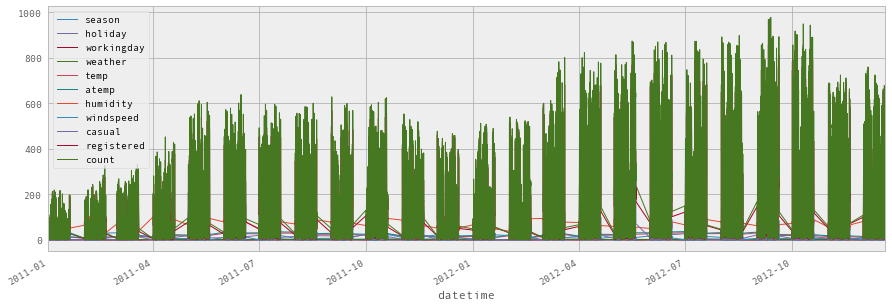

In [24]:
df = pd.read_csv('../../DataSets/competition/kaggle/Bike-Sharing-Demand/kaggle_bike_competition_train.csv', sep=',', encoding='latin1', parse_dates=['datetime'], dayfirst=True, index_col='datetime')
df.plot()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  